In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [287]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [288]:
print(df.shape)

(614, 13)


In [289]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [290]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

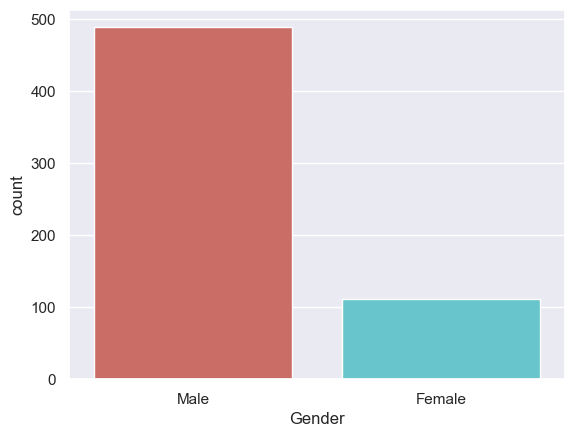

In [291]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [292]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [293]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

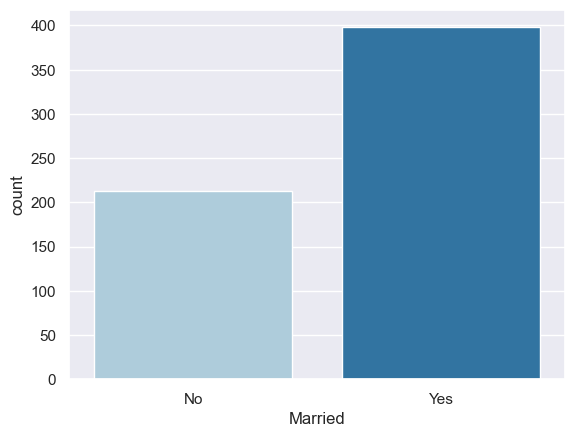

In [294]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [295]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [296]:
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

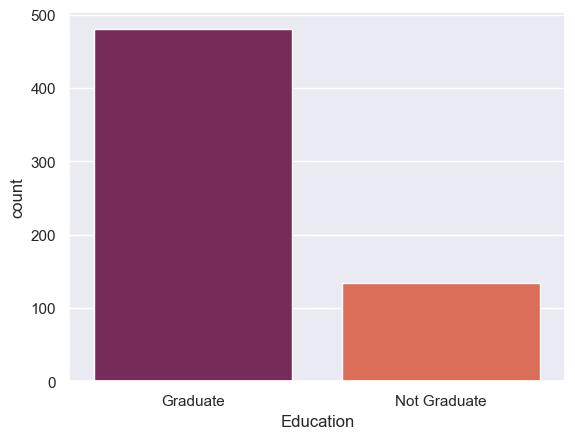

In [297]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [298]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


In [299]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

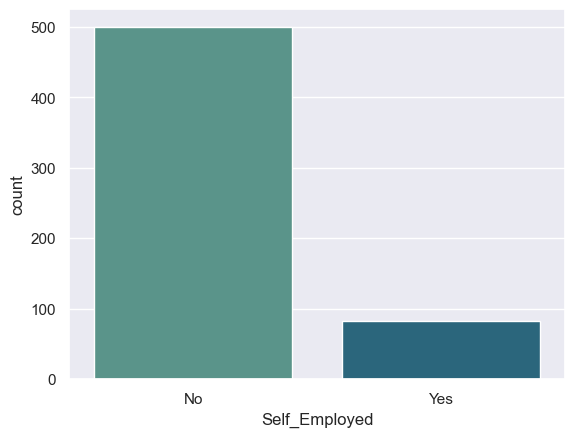

In [300]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [301]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [302]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

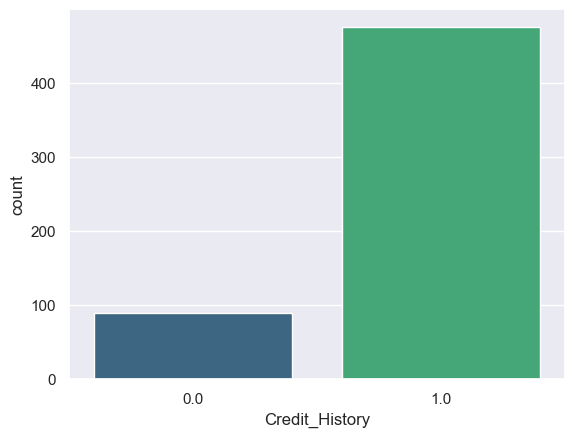

In [303]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [304]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [305]:
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

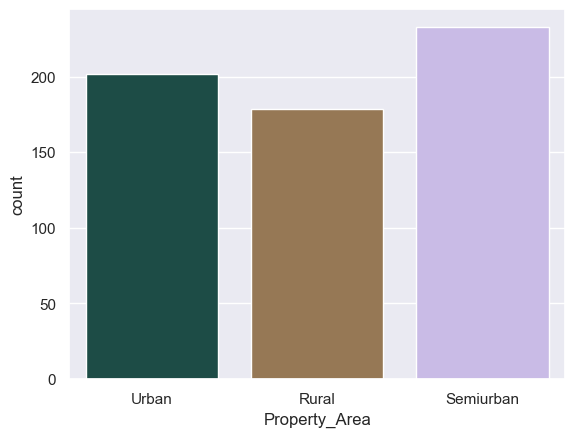

In [306]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [307]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


In [308]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

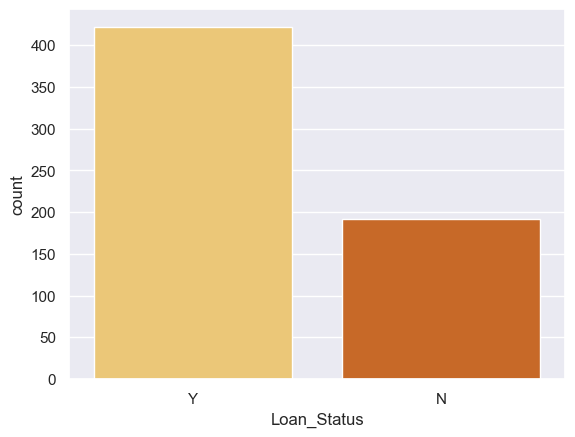

In [309]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [310]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [311]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

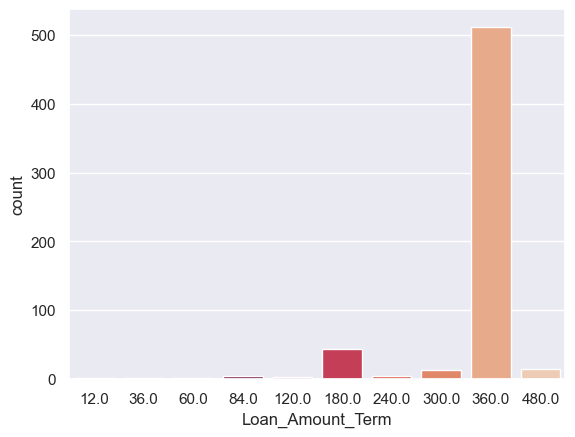

In [312]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [313]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


In [315]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


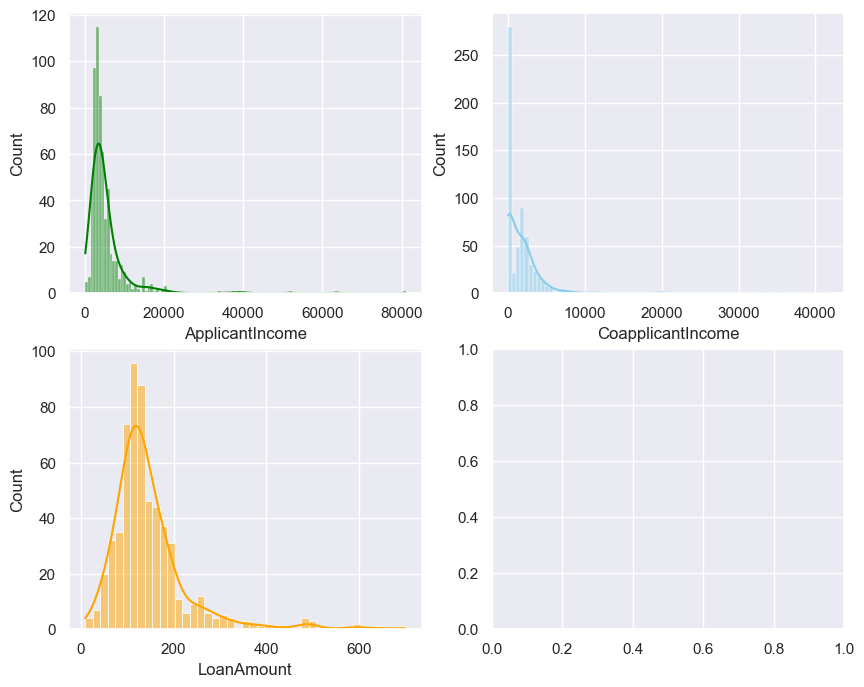

In [316]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

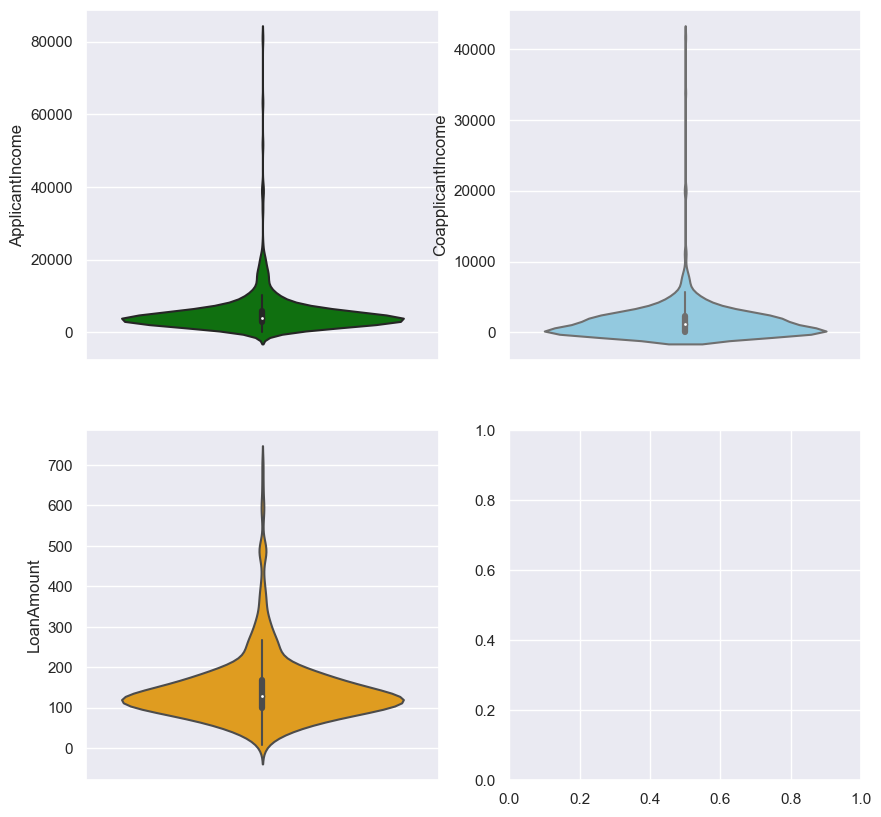

In [317]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

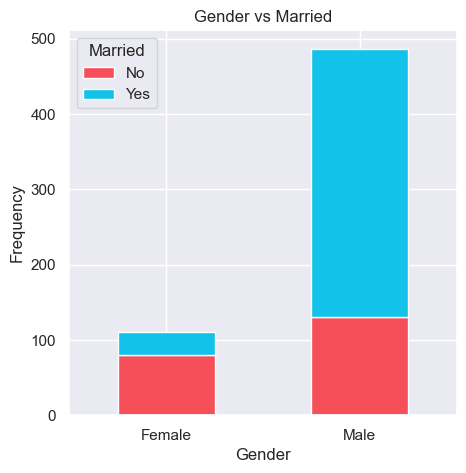

In [318]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

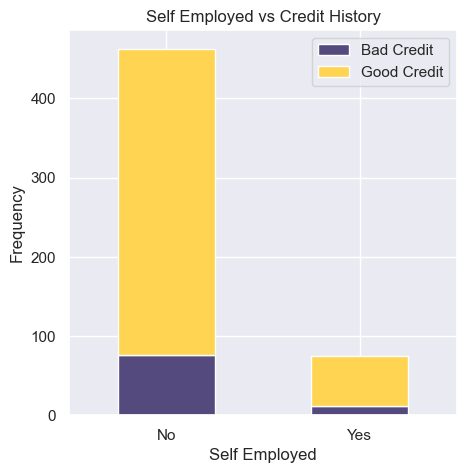

In [319]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

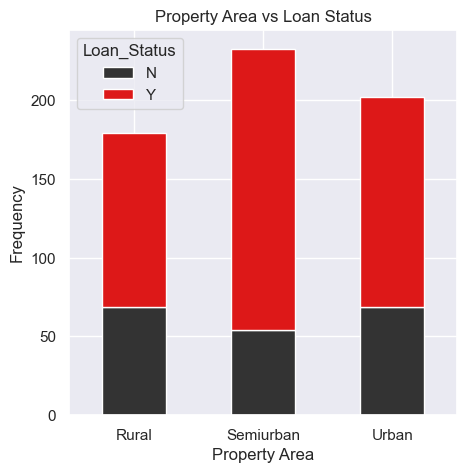

In [320]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

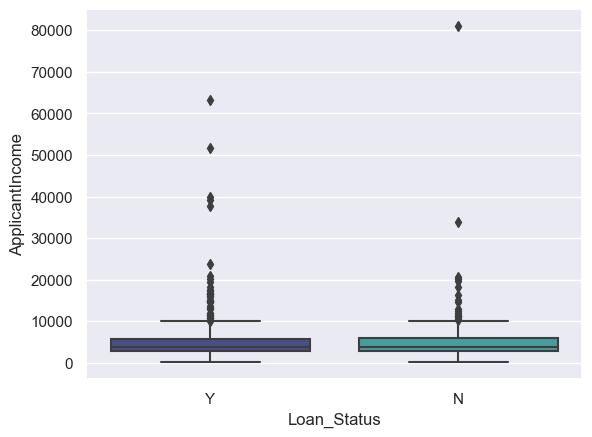

In [321]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

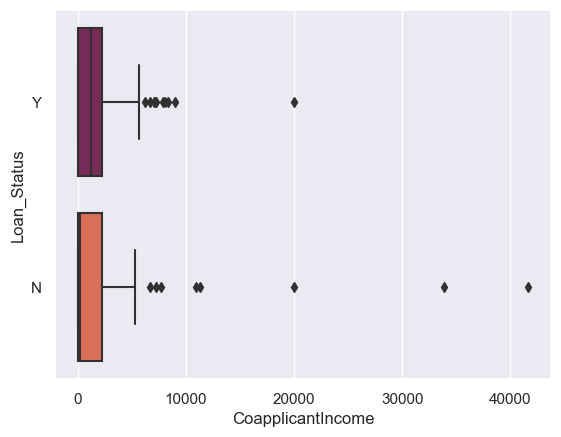

In [322]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

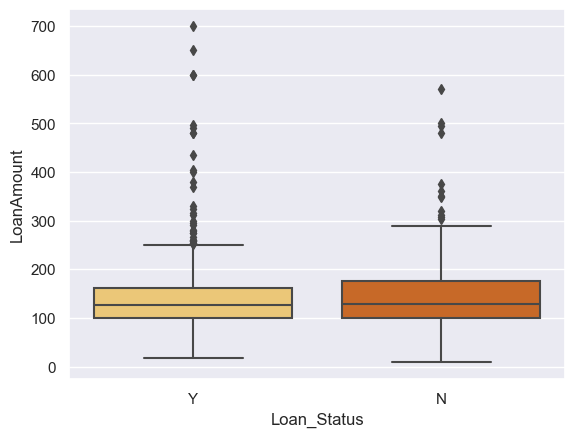

In [323]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

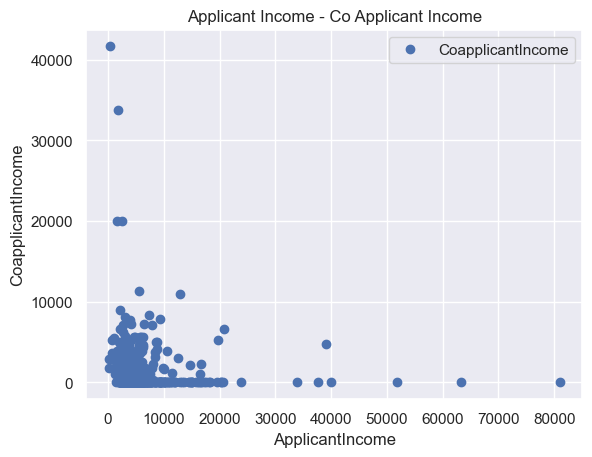

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40)


In [324]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

In [325]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

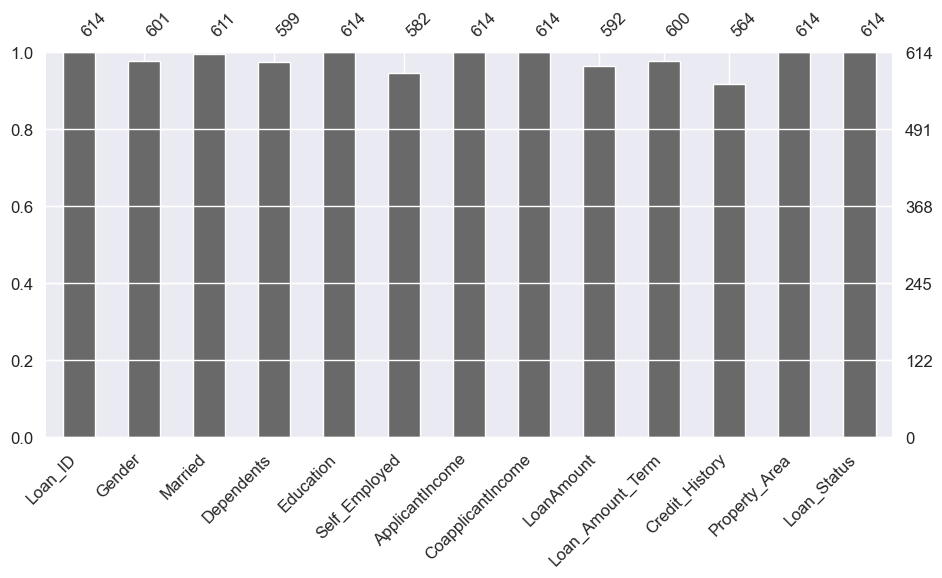

In [326]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

In [327]:
df = df.drop(['Loan_ID'], axis = 1)

In [328]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [329]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [330]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [331]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame containing the data

# Calculate the quartiles and IQR
Q1 = np.percentile(df, 25, axis=0)
Q3 = np.percentile(df, 75, axis=0)
IQR = Q3 - Q1

# Define a function to check for outliers
def is_outlier(row):
    return any((row < Q1 - 1.5 * IQR) | (row > Q3 + 1.5 * IQR))

# Create a mask for outliers
outliers_mask = df.apply(is_outlier, axis=1)

# Remove rows containing outliers
df = df[~outliers_mask]

# Reset the index if needed
df.reset_index(drop=True, inplace=True)


In [332]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

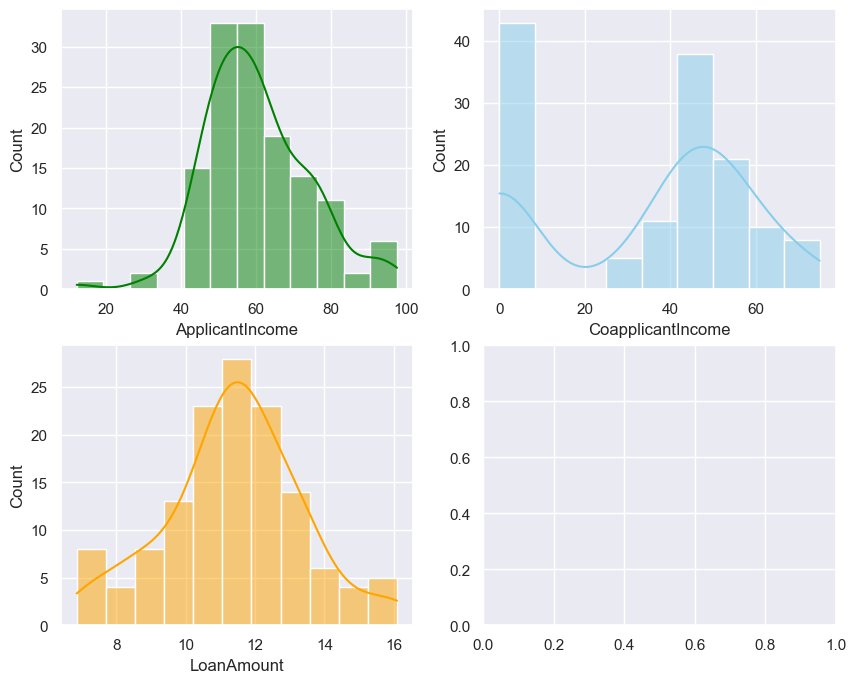

In [333]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [334]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [335]:
y.value_counts(dropna=False)


Loan_Status
True     112
False     24
Name: count, dtype: int64

In [336]:
X, y = SMOTE().fit_resample(X, y)

In [239]:
# from imblearn.under_sampling import RandomUnderSampler
# X = df.drop(["Loan_Status"], axis=1)
# y = df["Loan_Status"]
# # Create an instance of RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

# # Fit and resample the dataset to balance the classes
# X_resampled, y_resampled = rus.fit_resample(X, y)

In [337]:
y.head()

0     True
1     True
2    False
3     True
4     True
Name: Loan_Status, dtype: bool

In [338]:
X = MinMaxScaler().fit_transform(X)

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [244]:
# combined_df = pd.concat([df, y], axis=1)
# combined_df.dropna(subset=['Loan_Status'], inplace=True)
# combined_df = combined_df.iloc[:, :-1]
# combined_df.head()


In [245]:
# import pandas as pd

# # Assuming 'combined_df' is your DataFrame

# # Check if 'Loan_Status' exists in the DataFrame
# if 'Loan_Status' in combined_df.columns:
#     # Check the data type of the 'Loan_Status' column
#     loan_status_dtype = combined_df['Loan_Status'].dtype
    
#     # Check if the data type is categorical
#     if pd.api.types.is_categorical_dtype(loan_status_dtype):
#         print("The 'Loan_Status' column is categorical.")
#     else:
#         print("The 'Loan_Status' column is not categorical.")
# else:
#     print("The 'Loan_Status' column does not exist in the DataFrame.")



In [61]:
# from sklearn.model_selection import KFold #for K-fold cross validation
# from sklearn.model_selection import cross_val_score #score evaluation
# from sklearn.model_selection import cross_val_predict #prediction
# kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
# xyz=[]
# accuracy=[]
# std=[]
# classifiers=['Linear Svm','Radial Svm','KNN','Decision Tree',]
# models=[SVC(kernel='linear'),SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=4),DecisionTreeClassifier(),]
# for i in models:
#     model = i
#     cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
#     cv_result=cv_result
#     xyz.append(cv_result.mean())
#     std.append(cv_result.std())
#     accuracy.append(cv_result)
# new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
# new_models_dataframe2

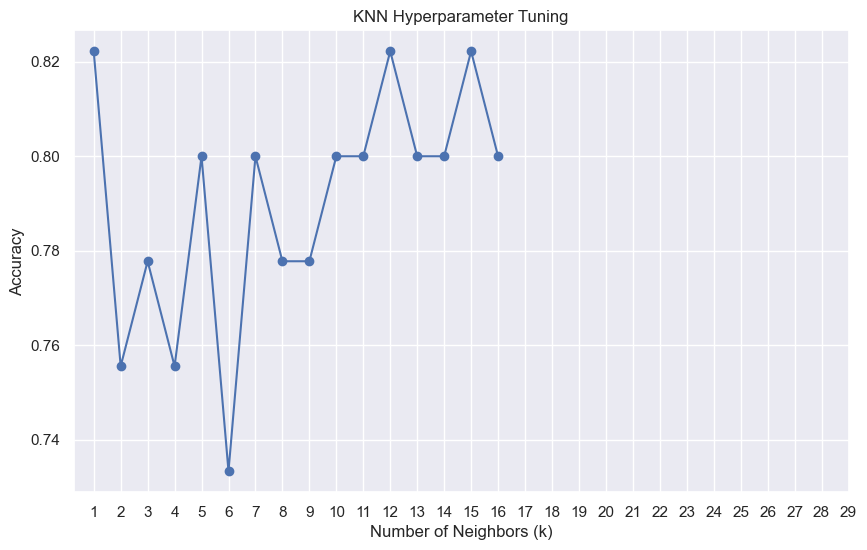

Best K value: 1
Best Accuracy: 82.22%


In [349]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define a range of k values to test
k_values = range(1, 17)
score_list = []

# Iterate over different values of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)
    score_list.append(score)

# Find the best k value
best_k = k_values[np.argmax(score_list)]
best_accuracy = max(score_list)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, score_list, marker='o', linestyle='-', color='b')
plt.title("KNN Hyperparameter Tuning")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(np.arange(1, 30, 1))

plt.show()

print("Best K value:", best_k)
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
knn_acc = best_accuracy

In [341]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'] + [0.01, 0.1, 1, 10]
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (model) from the grid search
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_svm_classifier.predict(X_test)

# Evaluate the best model
print("Best Hyperparameters:", best_params)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVCAcc = accuracy_score(y_test, y_pred)
print("SVC accuracy: {:.2f}%".format(SVCAcc * 100))



Best Hyperparameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

       False       0.81      0.88      0.84        24
        True       0.84      0.76      0.80        21

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45

[[21  3]
 [ 5 16]]
SVC accuracy: 82.22%


In [342]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (model) from the grid search
best_dt_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the best model
print("Best Hyperparameters:", best_params)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTC_Acc = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier accuracy: {:.2f}%".format(DTC_Acc * 100))
dt = DTC_Acc


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}
              precision    recall  f1-score   support

       False       0.66      0.79      0.72        24
        True       0.69      0.52      0.59        21

    accuracy                           0.67        45
   macro avg       0.67      0.66      0.66        45
weighted avg       0.67      0.67      0.66        45

[[19  5]
 [10 11]]
Decision Tree Classifier accuracy: 66.67%


In [355]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the hyperparameter grid to search
paramsGB = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [0.5, 1],
    'max_leaf_nodes': [2, 5, 10, 20, 30, 40, 50]
}

# Create a RandomizedSearchCV object
GB = RandomizedSearchCV(
    GradientBoostingClassifier(),
    paramsGB,
    cv=5,  # Number of cross-validation folds
    n_iter=50,  # Number of parameter settings sampled
    random_state=42  # Random seed for reproducibility
)

# Fit the randomized search to the data
GB.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = GB.best_params_

# Get the best estimator (model) from the randomized search
best_GB_classifier = GB.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_GB_classifier.predict(X_test)

# Evaluate the best model
print("Best Hyperparameters:", best_params)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
GBAcc = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier accuracy: {:.2f}%".format(GBAcc * 100))


Best Hyperparameters: {'subsample': 0.5, 'n_estimators': 200, 'max_leaf_nodes': 30, 'max_depth': 3}
              precision    recall  f1-score   support

       False       0.83      0.79      0.81        24
        True       0.77      0.81      0.79        21

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

[[19  5]
 [ 4 17]]
Gradient Boosting Classifier accuracy: 80.00%


In [ ]:
compare = pd.DataFrame({'Model': ['K Neighbors',   'SVM',  
                                   'Decision Tree', 
                                  'Gradient Boost'], 
                        'Accuracy': [ KNAcc*100,SVCAcc*100,
                                     dt*100, 
                                      GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,K Neighbors,92.857143
3,Gradient Boost,84.444444
1,SVM,82.222222
2,Decision Tree,66.666667


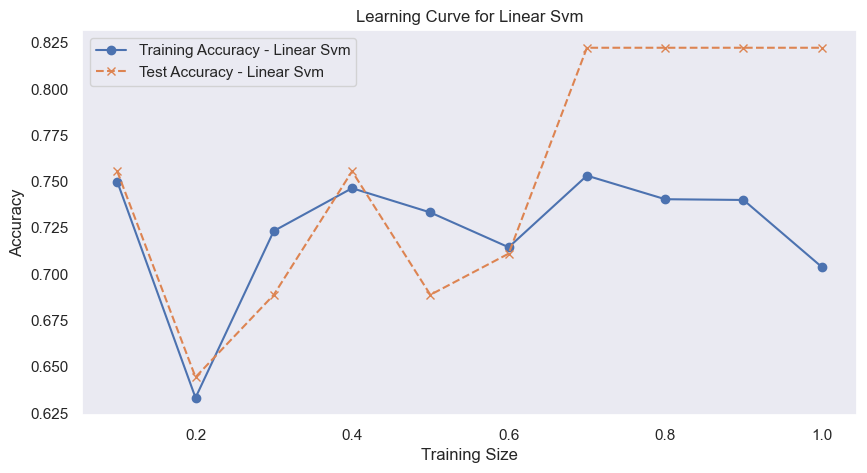

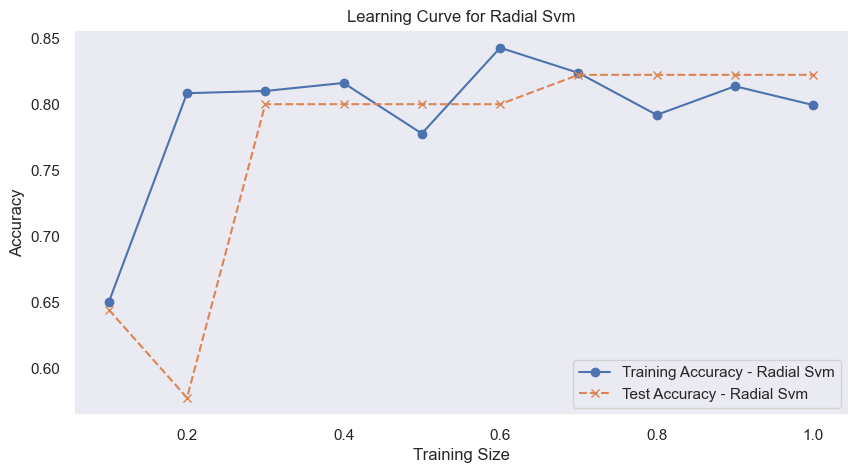

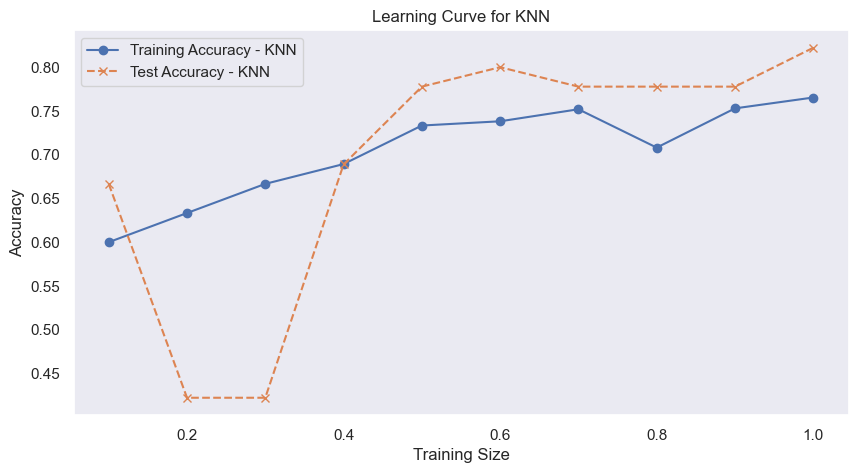

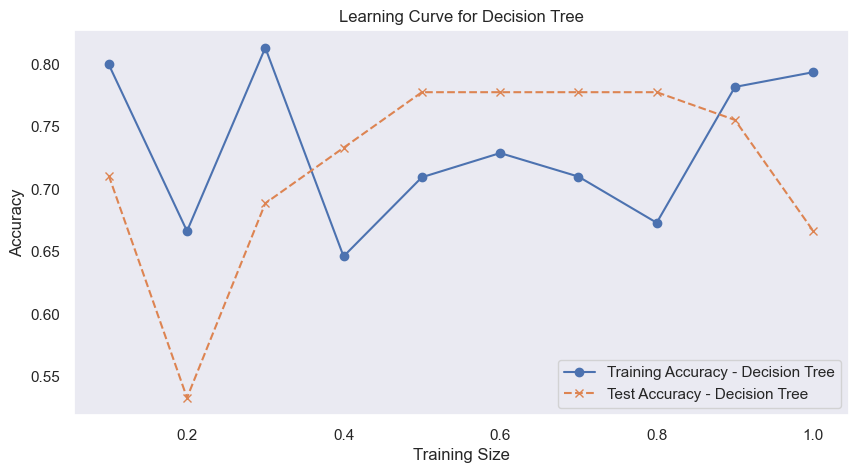

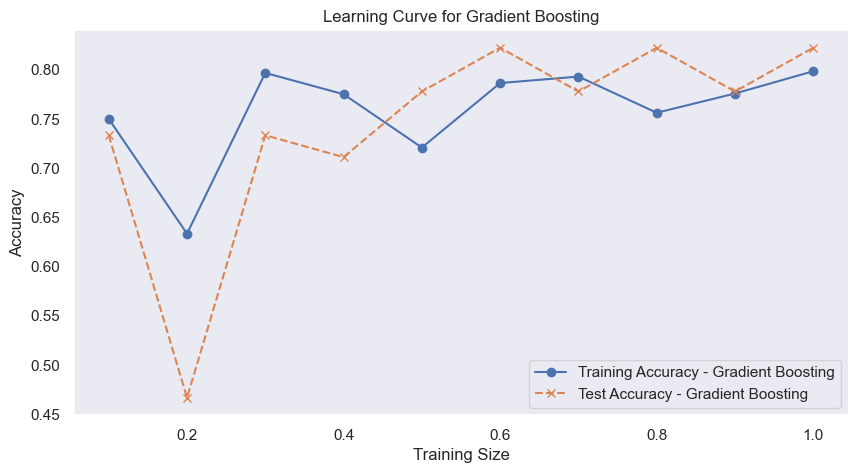

          Classifier  Train Accuracy  Test Accuracy
0         Linear Svm        0.703922       0.822222
1         Radial Svm        0.799346       0.822222
2                KNN        0.765359       0.822222
3      Decision Tree        0.793791       0.666667
4  Gradient Boosting        0.798366       0.822222


In [352]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize KFold and other variables
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
train_sizes = np.linspace(0.1, 1.0, 10)  # Vary the training size from 10% to 100%
classifiers = ['Linear Svm', 'Radial Svm', 'KNN', 'Decision Tree', 'Gradient Boosting']
models = [
    SVC(kernel='linear', gamma=10, C=1), 
    SVC(kernel='rbf', gamma=10, C=1),
    KNeighborsClassifier(n_neighbors=12),  # Best k value
    DecisionTreeClassifier(max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5),  # Best max_leaf_nodes value
    GradientBoostingClassifier(subsample=0.5, n_estimators=500, max_leaf_nodes=50, max_depth=4)  # Best hyperparameters
]

# Lists to store final training and testing accuracies
final_train_accuracies = []
final_test_accuracies = []

for i, model in enumerate(models):
    train_accuracy = []  # Store training accuracy for the current model
    test_accuracy = []   # Store test accuracy for the current model
    
    for train_size in train_sizes:
        X_train_partial = X_train[:int(len(X_train) * train_size)]
        y_train_partial = y_train[:int(len(y_train) * train_size)]
        
        cv_result = cross_val_score(model, X_train_partial, y_train_partial, cv=kfold, scoring="accuracy")
        cv_result = cv_result
        
        # Calculate training accuracy
        train_accuracy.append(cv_result.mean())
        
        # Fit the model to the entire training set and calculate test accuracy
        model.fit(X_train_partial, y_train_partial)
        y_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_accuracy.append(test_acc)
    
    # Create a new plot for the current classifier
    plt.figure(figsize=(10, 5))
    plt.plot(train_sizes, train_accuracy, marker='o', label=f'Training Accuracy - {classifiers[i]}')
    plt.plot(train_sizes, test_accuracy, marker='x', linestyle='--', label=f'Test Accuracy - {classifiers[i]}')
    plt.title(f'Learning Curve for {classifiers[i]}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    # Calculate the final training and testing accuracies for the current classifier
    final_train_acc = train_accuracy[-1]
    final_test_acc = test_accuracy[-1]
    
    final_train_accuracies.append(final_train_acc)
    final_test_accuracies.append(final_test_acc)

# Create a DataFrame to display final training and testing accuracies
accuracy_df = pd.DataFrame({'Classifier': classifiers, 'Train Accuracy': final_train_accuracies, 'Test Accuracy': final_test_accuracies})

# Display the accuracy DataFrame
print(accuracy_df)


In [358]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# Define a custom binary classification model using Keras
def create_binary_classification_model(hidden_layers=1, learning_rate=0.01):
    model = keras.Sequential([
        layers.Input(shape=(16,)),  # Adjust input shape to match the number of features
    ])
    
    for _ in range(hidden_layers):
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification
    
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create a KerasClassifier for use in GridSearchCV
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_binary_classification_model, verbose=0)

# Define hyperparameters and their respective values to search
param_grid = {
    'hidden_layers': [1, 2, 3],  # Number of hidden layers
    'learning_rate': [0.001, 0.01, 0.1]  # Learning rate
}

# Define a custom scoring metric (F1-score) for binary classification
scoring = make_scorer(f1_score, greater_is_better=True)

# Create a grid search cross-validation object
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, scoring=scoring, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_hidden_layers = best_params['hidden_layers']
best_learning_rate = best_params['learning_rate']

# Create the final model with the best hyperparameters
final_model = create_binary_classification_model(hidden_layers=best_hidden_layers, learning_rate=best_learning_rate)

# Train the final model on the entire training data
final_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Evaluate the final model on the test data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)

# Print the results
print("Best Hyperparameters:", best_params)
print("Final Testing Accuracy:", test_accuracy)


/var/folders/17/mgxkwwr97nq856_lvjfg5_th0000gn/T/ipykernel_69240/1703154022.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_binary_classification_model, verbose=0)


2/2 [==============================] - 1s 199ms/step


2/2 [==============================] - 1s 456ms/step


2/2 [==============================] - 1s 163ms/step


2/2 [==============================] - 1s 541ms/step


2/2 [==============================] - 1s 209ms/step


2/2 [==============================] - 1s 172ms/step


2/2 [==============================] - 1s 132ms/step


2/2 [==============================] - 1s 163ms/step


2/2 [==============================] - 1s 174ms/step


2/2 [==============================] - 1s 170ms/step


2/2 [==============================] - 1s 144ms/step


2/2 [==============================] - 2s 1s/step


2/2 [==============================] - 1s 229ms/step


2/2 [==============================] - 1s 207ms/step


2/2 [==============================] - 1s 151ms/step


2/2 [==============================] - 1s 527ms/step


2/2 [==============================] - 2s 286ms/step


2/2 [==============================] - 2s 751ms/step


2/2 [==============================] - 2s 387ms/step


2/2 [==============================] - 1s 602ms/step


2/2 [==============================] - 1s 609ms/step


2/2 [==============================] - 1s 335ms/step


2/2 [==============================] - 2s 400ms/step


2/2 [==============================] - 1s 377ms/step


2/2 [==============================] - 1s 254ms/step


2/2 [==============================] - 1s 500ms/step


2/2 [==============================] - 1s 591ms/step


2/2 [==============================] - 1s 335ms/step


2/2 [==============================] - 1s 544ms/step


2/2 [==============================] - 1s 296ms/step


2/2 [==============================] - 1s 348ms/step


2/2 [==============================] - 1s 323ms/step


2/2 [==============================] - 3s 517ms/step


2/2 [==============================] - 2s 333ms/step


2/2 [==============================] - 2s 585ms/step


2/2 [==============================] - 2s 858ms/step


2/2 [==============================] - 1s 321ms/step


2/2 [==============================] - 2s 668ms/step


2/2 [==============================] - 2s 530ms/step


2/2 [==============================] - 1s 309ms/step


2/2 [==============================] - 2s 675ms/step


2/2 [==============================] - 1s 354ms/step


2/2 [==============================] - 1s 333ms/step


2/2 [==============================] - 2s 620ms/step


2/2 [==============================] - 2s 391ms/step


Epoch 1/100
3/3 [==============================] - 10s 2s/step - loss: 0.9007 - accuracy: 0.4972
Epoch 2/100
3/3 [==============================] - 2s 482ms/step - loss: 0.8386 - accuracy: 0.5140
Epoch 3/100
3/3 [==============================] - 1s 502ms/step - loss: 0.7835 - accuracy: 0.5587
Epoch 4/100
3/3 [==============================] - 1s 547ms/step - loss: 0.7402 - accuracy: 0.5642
Epoch 5/100
3/3 [==============================] - 1s 294ms/step - loss: 0.6917 - accuracy: 0.6089
Epoch 6/100
3/3 [==============================] - 1s 387ms/step - loss: 0.6605 - accuracy: 0.6313
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6292 - accuracy: 0.6592
Epoch 8/100
3/3 [==============================] - 1s 428ms/step - loss: 0.6084 - accuracy: 0.6648
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5905 - accuracy: 0.6760
Epoch 10/100
3/3 [==============================] - 1s 434ms/step - loss: 0.5681 - accuracy: 0.7095
Epoch 11/100


Epoch 1/100
3/3 [==============================] - 6s 2s/step - loss: 0.8221 - accuracy: 0.5475 - val_loss: 0.7049 - val_accuracy: 0.4667
Epoch 2/100
3/3 [==============================] - 1s 258ms/step - loss: 0.7734 - accuracy: 0.5587 - val_loss: 0.6979 - val_accuracy: 0.4667
Epoch 3/100
3/3 [==============================] - 0s 82ms/step - loss: 0.7250 - accuracy: 0.6257 - val_loss: 0.6912 - val_accuracy: 0.4667
Epoch 4/100
3/3 [==============================] - 0s 154ms/step - loss: 0.6714 - accuracy: 0.6425 - val_loss: 0.6847 - val_accuracy: 0.5111
Epoch 5/100
3/3 [==============================] - 2s 891ms/step - loss: 0.6472 - accuracy: 0.6313 - val_loss: 0.6783 - val_accuracy: 0.5778
Epoch 6/100
3/3 [==============================] - 2s 615ms/step - loss: 0.6233 - accuracy: 0.6201 - val_loss: 0.6724 - val_accuracy: 0.6222
Epoch 7/100
3/3 [==============================] - 0s 120ms/step - loss: 0.5938 - accuracy: 0.6313 - val_loss: 0.6666 - val_accuracy: 0.6889
Epoch 8/100
3/3 [

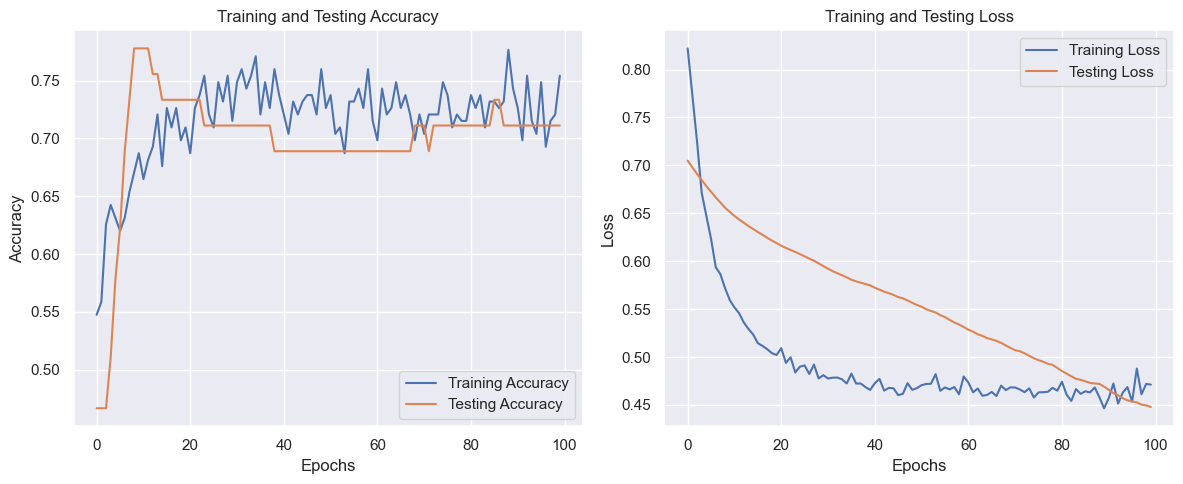

In [359]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Load your data (X_train, y_train, X_test, y_test) here

# Define a custom binary classification model using Keras
def create_binary_classification_model():
    model = keras.Sequential([
        layers.Input(shape=(16,)),  # Adjust input shape to match the number of features (16)
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])
    return model

# Create the binary classification model
model = create_binary_classification_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Plot training and testing accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')

# Plot training and testing loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')

plt.tight_layout()
plt.show()
